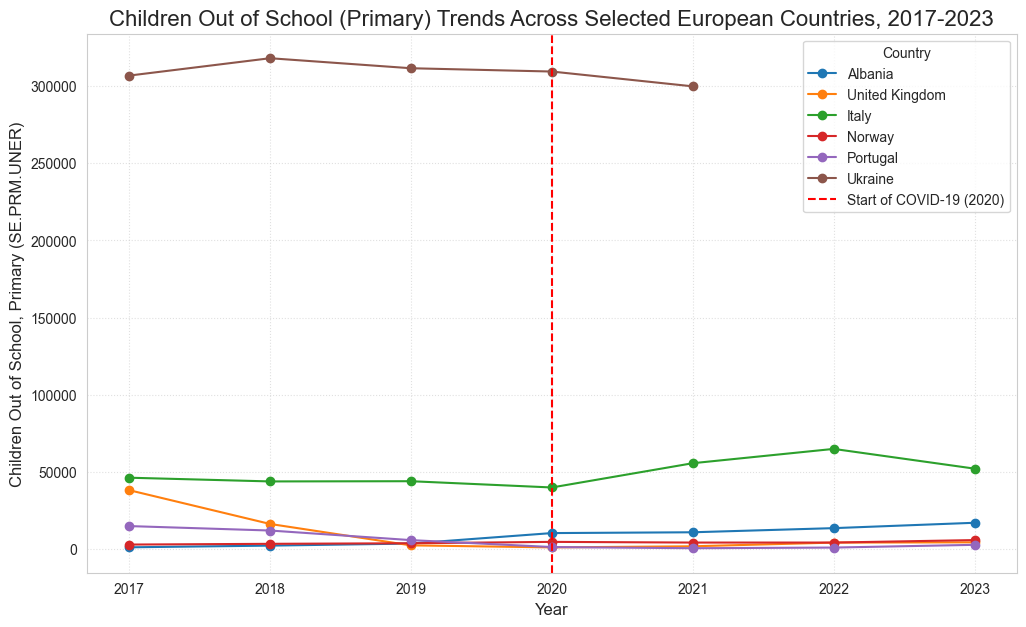

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data from the 'data' folder
# Path is relative to the project root, assuming the notebook is executed from the root.
try:
    df = pd.read_csv('../data/cleaned_wb_data.csv')
except FileNotFoundError:
    print("FATAL ERROR: Data file not found; please ensure 'cleaned_wb_data.csv' is in the 'data/' folder.")
    exit()

# Convert year to integer for clean plotting
df['year'] = df['year'].astype(int)
df_clean = df.dropna(subset=['children_out_of_school_primary']).copy()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Generate Plot Data on a single axis
for country in df_clean['country_name'].unique():
    country_data = df_clean[df_clean['country_name'] == country]
    
    plt.plot(
        country_data['year'],
        country_data['children_out_of_school_primary'],
        marker='o',
        linestyle='-',
        label=country
    )

# Add COVID-19 Line
plt.axvline(
    x=2020,
    color='r',
    linestyle='--',
    linewidth=1.5,
    label='Start of COVID-19 (2020)'
)

# Finalize Aesthetics
plt.title(
    'Children Out of School (Primary) Trends Across Selected European Countries, 2017-2023',
    fontsize=16
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Children Out of School, Primary (SE.PRM.UNER)', fontsize=12)

# Set the legend location to the upper right, as requested
plt.legend(title='Country', loc='upper right')

plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(np.arange(df['year'].min(), df['year'].max() + 1, 1))
plt.ticklabel_format(style='plain', axis='y')

# Save the figure
plt.savefig('../figures/children_out_of_school_analysis.png')
plt.show()